In [11]:
rm(list=ls())
setwd("D:/2019 Fall/STAT 628/module 2")
data = read.csv("BODYFAT.csv")[,-c(1,3)]
m = lm(BODYFAT~.,data)

According to the relationship of DENSITY and BODYFAT is determined, we take DENSITY as response variable.

### Check missing values

In [12]:
max(is.na(data))

[1] 0

As the command returns a 0, there is no misiing value in this data set.

### Dimension of data

In [13]:
n = nrow(data); p = ncol(data[,-1])
cat("This data(X) is a ",n,"x",p," matrix.",sep="" )

This data(X) is a 252x14 matrix.

### Visualization of target vectors

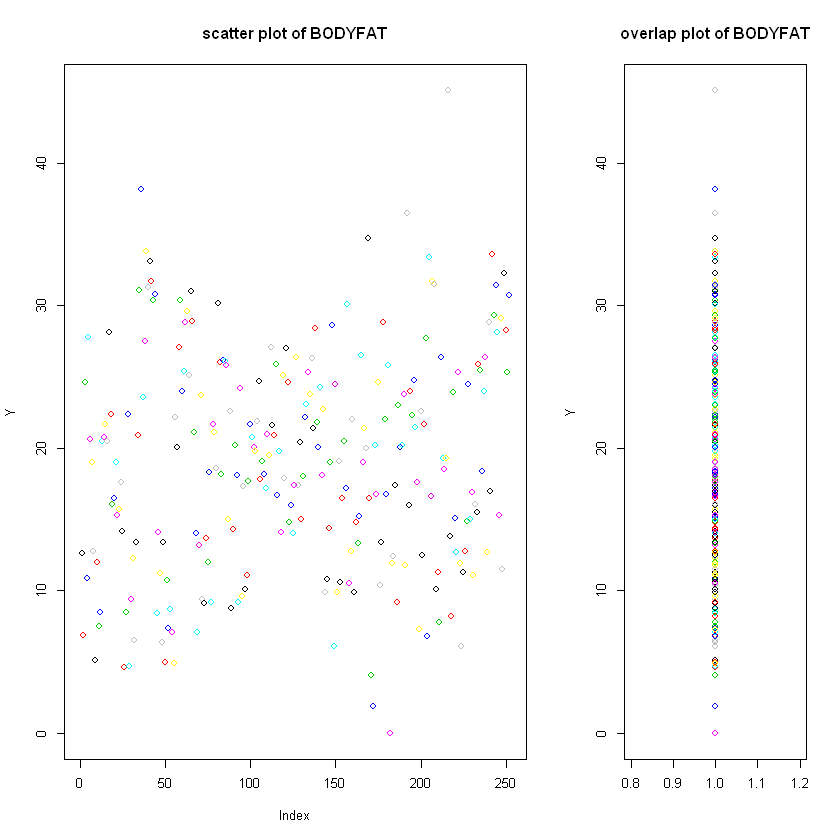

In [14]:
Y = data$BODYFAT
mat = matrix(c(1,1,2),nrow=1)
layout(mat)
plot(data$BODYFAT,col=1:n,ylab="Y",main="scatter plot of BODYFAT")
plot(rep(1,n),data$BODYFAT,col=1:n,xlab="",ylab="Y",main="overlap plot of BODYFAT",xlim=c(0.8,1.2))

From pictures above, the target vector can be considered as a continuous variable.

Consider a linear reression model in this case. 

### A brief review of data

In this part, we combine boxplot and 5-number summary to see if there is any strange data.

Here we just show what's important.

In order to observe the data directly, we scale data in the boxplot.

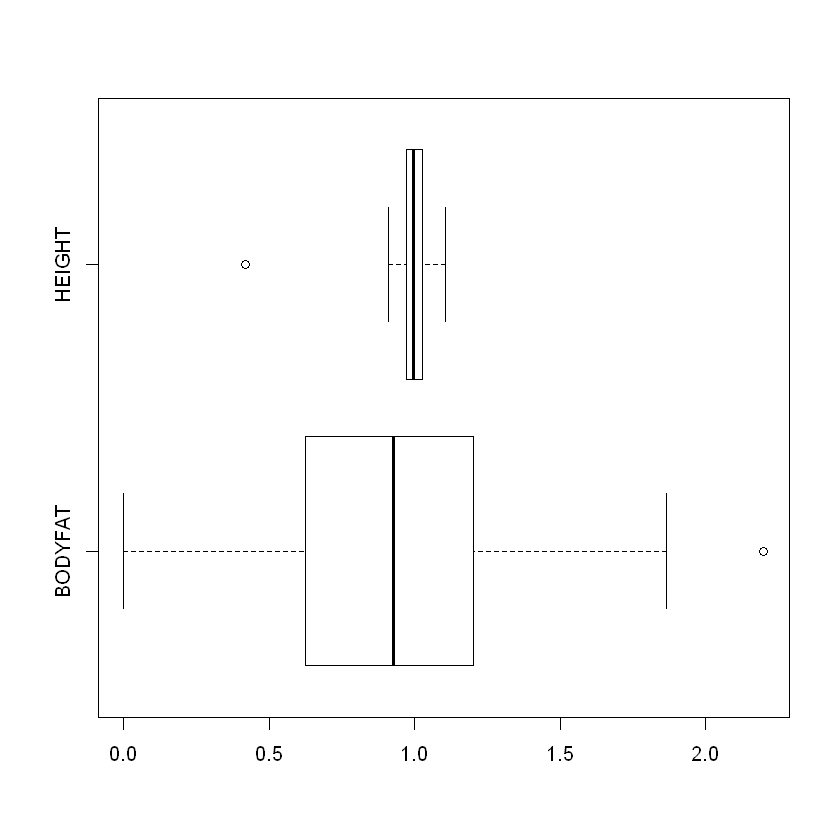

In [16]:
a = as.data.frame(apply(data,MARGIN=2,scale,center=F))
boxplot(a[,c("BODYFAT","HEIGHT")],horizontal=T)

In [17]:
summary(data[,c("BODYFAT","HEIGHT")])

    BODYFAT          HEIGHT     
 Min.   : 0.00   Min.   :29.50  
 1st Qu.:12.80   1st Qu.:68.25  
 Median :19.00   Median :70.00  
 Mean   :18.94   Mean   :70.15  
 3rd Qu.:24.60   3rd Qu.:72.25  
 Max.   :45.10   Max.   :77.75  

In the data cleaning process, data points with minimum BODYFAT or HEIGHT values are removed.

### Outliers detection

From an original linear regression model, use three methods below for testing outliers together:

1. remove data points whose standardized residuals' absolute values are greater than 2;

2. remove data points with Cook's distances greater than $\frac{4}{n-p}$;

3. apply outlierTest function in the car package.

Stop detection when the outlierTest function returns no outliers under Bonferroni test..

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
207 2.401631            0.01711           NA

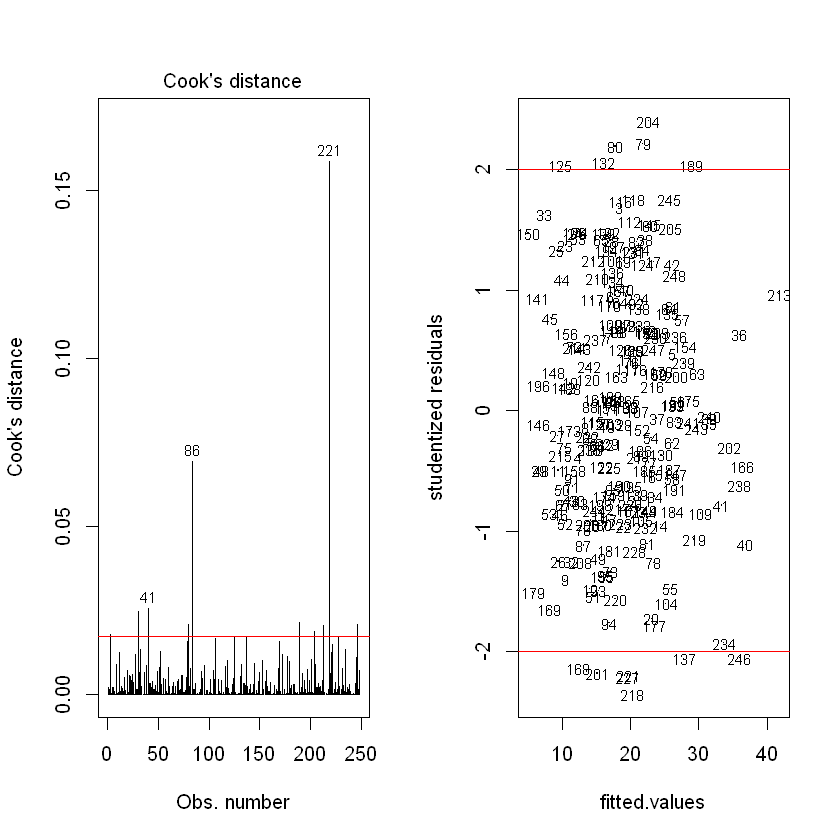

In [20]:
m = lm(data$BODYFAT~.,data)
# test outliers 
plot.outlier=function(model,data){
  n = nrow(data)
  p = ncol(data)
  par(mfrow=c(1,2))
  plot(model,4)
  abline(h=4/(n-p),col="red")
  plot(x=model$fitted.values,y=rstudent(model),pch=".",
       xlab="fitted.values",ylab="studentized residuals")
  text(x=model$fitted.values,y=rstudent(model),labels=1:nrow(data),cex=0.75)
  abline(h=2,col="red")
  abline(h=-2,col="red")
  outlierTest(model)
}

plot.outlier(m,data)
par(mfrow=c(1,1))

We just remove data points with large Cook's distance or whose residuals are obviously far away from the red lines.

Let's have a look at those points closes to red lines.

In [21]:
ind = c(81,82,207,218,204,221,224,225)
data[ind,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
83,18.2,64,190.25,72.75,25.3,39.3,103.1,97.8,99.6,58.9,39.0,23.0,34.3,29.6,19.0
84,26.2,70,170.75,70.00,24.5,38.7,101.8,94.9,95.0,56.0,36.5,24.1,31.2,27.3,19.2
210,11.3,47,159.75,70.75,22.5,34.5,92.9,84.4,94.0,56.0,38.2,22.6,29.0,26.2,17.6
221,12.7,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9
207,31.7,44,166.00,65.50,27.2,39.1,100.6,93.9,100.1,58.9,37.6,21.4,33.1,29.5,17.3
225,11.3,55,179.75,68.75,26.8,41.1,106.9,95.3,98.2,57.4,37.1,21.8,34.1,31.1,19.2
228,24.5,55,198.50,74.25,25.3,38.3,105.3,96.7,106.6,64.0,42.6,23.4,33.2,30.0,18.4
229,15.0,56,174.50,69.50,25.4,38.1,104.0,89.4,98.4,58.4,37.4,22.5,34.6,30.1,18.8


It can be concluded from the table above, the suspicious outliers should not be removed as they are in the normal range of people health data.

In [22]:
ind = unique(c(39,42,86,224,which.min(data$BODYFAT),which.min(data$HEIGHT)))
data = data[-ind,]

In the progress above, 5 outliers are removed.

Write the new data into a csv file. (As we have done so, don't run the last cell.)

In [7]:
# write.csv(data,"data.cleaned.csv")